----HEAD----
----MEAN----
----INFO----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14521 entries, 0 to 14520
Data columns (total 10 columns):
custcode        14521 non-null int64
Año             14521 non-null int64
Trimestre       14521 non-null object
Mes             14521 non-null object
Día             14521 non-null int64
Tipo_Cliente    14521 non-null object
Total_abono     14341 non-null float64
declinecause    14521 non-null object
saldo           14521 non-null float64
Baja            14521 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB
----UNIQUES----
----CALCULO DE BALANCEO DE LA VARIABLE----
Baja
0    8418
1    6103
dtype: int64


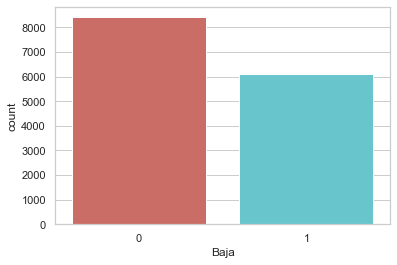

porcentaje de bajas 42.028785896288134
percentage of reversiones 57.971214103711866
RATIO:
42.028785896288134
:
57.971214103711866
---HISTORICO---


<Figure size 432x288 with 0 Axes>

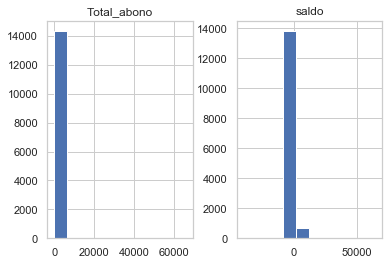

---Algo---


C:\Users\gjordan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\gjordan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


---SHAPE---
----20% 80%----
----COMPILAMOS EL MODELO----
----HACEMOS UNAS PREDICCIONES----
----Predicciones----
0.9951807228915662
----Matriz de confusion---
[[1670    0]
 [  14 1221]]
----reporte de clasificacion---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1670
           1       1.00      0.99      0.99      1235

    accuracy                           1.00      2905
   macro avg       1.00      0.99      1.00      2905
weighted avg       1.00      1.00      1.00      2905

----probamos datos de entrada en el modelo a ver que predice
----CURVA ROC----


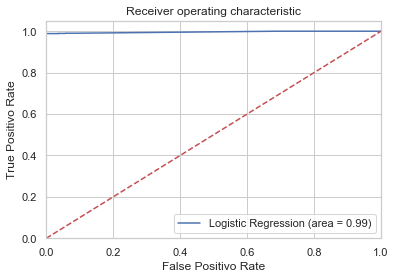

In [148]:
#la finalidad de este proyecto es unificar e iniciar un procedimiento de creacion de modelo de machine learning con todas las etapas
#de pruebas de datos necesarias para validar los datos y crear nuestro modelo y probarlo.
#
#
#


import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
%matplotlib inline

#tipos de datos
#custcode        14522 non-null int64 CONTINUO cuantitativo
#Año             14522 non-null int64 CONTINUO cuantitativo
#Trimestre       14522 non-null object CATEGORICO cualitativo
#Mes             14522 non-null object CATEGORICO cualitativo
#Día             14522 non-null int64 CONTINUO cuantitativo
#Tipo_Cliente    14522 non-null object CATEGORICO cualitativo
#Total abono     14342 non-null float64 CONTINUO cuantitativo
#declinecause    14522 non-null object CATEGORICO cualitativo
#saldo           14522 non-null float64 CONTINUO cuantitativo
#Baja            14522 non-null int64 CONTINUO cuantitativo

#cargamos el archivo
print("----HEAD----")
dataframe = pd.read_csv(r"bajas_entrenamiento.csv")
dataframe.head()

#mas observaciones
print("----MEAN----")
dataframe.groupby('declinecause').mean()
#dataframe.describe()

#ver los nulos
print("----INFO----")
dataframe.info()

#vemos los uniques de la columna categorica por si los podemos acortar
print("----UNIQUES----")
dataframe['Mes'].unique()

#convertir Mes enero febrero y marzo a 1er trimestre solamente.... esto es a modo de ejmplo de un uso real.
#data['Mes']=np.where(data['Mes'] =='Enero', '1er Trim', data['Mes'])
#data['Mes']=np.where(data['Mes'] =='febrero', '1er Trim', data['Mes'])
#data['Mes']=np.where(data['Mes'] =='Marzo', '1er Trim', data['Mes'])


#corroboramos cuantos resultados tenemos de cada grupo baja 1 si o 0 no
print("----CALCULO DE BALANCEO DE LA VARIABLE----")
print(dataframe.groupby('Baja').size())
#o
dataframe['Baja'].value_counts()
sb.countplot(x='Baja', data=dataframe, palette='hls')
plt.show()
plt.savefig('count_plot')

conteo_reversiones = len(dataframe[dataframe['Baja']==0])
conteo_bajas = len(dataframe[dataframe['Baja']==1])
pct_de_bajas = conteo_bajas/(conteo_bajas+conteo_reversiones)
print("porcentaje de bajas", pct_de_bajas*100)
pct_reversiones = conteo_reversiones/(conteo_reversiones+conteo_bajas)
print("percentage of reversiones", pct_reversiones*100)
print("RATIO:")
print(pct_de_bajas*100)
print(":")
print(pct_reversiones*100)

#visualizemos datos a ver que calidad tenemos
print("---HISTORICO---");
dataframe.drop(['custcode', 'Año','Trimestre', 'Día', 'Baja'], 1).hist()
plt.show()

#
print("---Algo---");
sb.pairplot(dataframe.dropna(), hue='Baja', height=4, vars=["Total_abono", "saldo"])

#creamos el modelo de regresion
print("---SHAPE---");
dataframe = dataframe.fillna(method='ffill') #fix para valores vacios nulos y Nan
X = np.array(dataframe.drop(['custcode','Año','Trimestre', 'Mes', 'Día','Baja', 'declinecause', 'Tipo_Cliente'],1))
y = np.array(dataframe['Baja'])
#np.isnan(dataframe)
#np.where(np.isnan(X))
#np.nan_to_num(X)
X.shape

%matplotlib inline
#pd.crosstab(dataframe.declinecause,dataframe.Baja).plot(kind='bar')
#plt.title('Frecuencia de reversiones por declinecause')
#plt.xlabel('Causas')
#plt.ylabel('Frecuencia de reversiones')
#plt.savefig('rev_cause')
#fuerte predictor de la variable solicitada


#table = pd.crosstab(dataframe.Trimestre,dataframe.Baja)
#table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
#plt.title('Frecuencia de reversiones por Trimestre')
#plt.xlabel('Trimestre')
#plt.ylabel('Frecuencia de reversiones')
#plt.savefig('rev_trim')
#bajo predictor de la variable solicitada

#table = pd.crosstab(dataframe.Tipo_Cliente,dataframe.Baja)
#table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
#plt.title('Frecuencia de reversiones por Tipo_Cliente')
#plt.xlabel('Tipo_Cliente')
#plt.ylabel('Frecuencia de reversiones')
#plt.savefig('rev_tipo')
#bajo predictor de la variable solicitada

#table = pd.crosstab(dataframe.Año,dataframe.Baja)
#table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
#plt.title('Frecuencia de reversiones por Año')
#plt.xlabel('Año')
#plt.ylabel('Frecuencia de reversiones')
#plt.savefig('rev_año')
#no representativo predictor de la variable solicitada

#pd.crosstab(dataframe.Mes,dataframe.Baja).plot(kind='bar')
#plt.title('Frecuencia de reversiones por Mes')
#plt.xlabel('Mes')
#plt.ylabel('Frecuencia de reversiones')
#plt.savefig('rev_mes')
#??? predictor de la variable solicitada

#dataframe.Total_abono.hist()
#plt.title('Histograma por Total abono')
#plt.xlabel('Total abono')
#plt.ylabel('Frecuencia de reversiones')
#plt.savefig('hist_rev_causa')

#dataframe.saldo.hist()
#plt.title('Histograma por saldo')
#plt.xlabel('saldo')
#plt.ylabel('Frecuencia de reversiones')
#plt.savefig('hist_rev_causa')

#np.isnan(dataframe.any())
#np.isfinite(dataframe.all())
#X = X.reset_index()

#ajustamos fit al modelo 
#dataframe.isnull().any()

print("----20% 80%----")
#armamos un 20% para validar
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

print("----COMPILAMOS EL MODELO----")
model = linear_model.LogisticRegression()
model.fit(X,y)

print("----HACEMOS UNAS PREDICCIONES----")
#predictions = model.predict(X)
#print(predictions)[6:8]
#model.score(X,y) #prediccion media de las predicciones

#name='Regresion logistica'
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
#cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
#msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#print(msg)

print("----Predicciones----")
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

print("----Matriz de confusion---") #muestra cuantos resultados equivocados tuvo de cada clase (los que no están en la diagonal)
print(confusion_matrix(Y_validation, predictions))

print("----reporte de clasificacion---")# F1-score, que tiene en cuenta la precisión y recall. °support cuantos registros se usaron de cada posibilidad 1 o 0 |recall 1 sin error 0.5 mitad errores mitas aciertos sobre la cant de support
print(classification_report(Y_validation, predictions))

print("----probamos datos de entrada en el modelo a ver que predice")
X_new = pd.DataFrame({'Total_abono': [0], 'saldo': [0]})
model.predict(X_new)

print("----CURVA ROC----")#usada para clasificadores binarios un buen clasificador suele permanecer lejos de la linea de puntos
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_validation, model.predict(X_validation))
fpr, tpr, thresholds = roc_curve(Y_validation, model.predict_proba(X_validation)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positivo Rate')
plt.ylabel('True Positivo Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()